# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL to retrieve data
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Create empty lists to store the responses
lat1 = []
lon1 = []
temp1_max = []
humidity1 = []
cloudity1 = []
wind_speed1 = []
country1 = []
date1 = []
city1 = []

# Start retrieving data
print ('Beginning Data Retrieval')     
print ('-----------------------------')

# Loop through list of cities
for index, city in enumerate(cities, start = 1):
    
    #Build query URL
    query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    
    #Make request and store response   
    weather_response = requests.get(query_url)
    
    #JSON-ify response
    weather_json = weather_response.json()
    
    #Try to get data from JSON responce
    try:
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        temp_max = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudity = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
    
        #Append it to created empty lists
        city1.append(city)
        lat1.append(lat)
        lon1.append(lon)
        temp1_max.append(temp_max)
        humidity1.append(humidity)
        cloudity1.append(cloudity)
        wind_speed1.append(wind_speed)
        country1.append(country)
        date1.append(date)
    
        print(f' Processing Record of city #{index} | {city}')
    
        time.sleep(1)
    # If not make exception
    except:
        print('City not found. Skipping...')

print ( '-----------------------------')
print ('Data Retrieval Complete')      
print ('-----------------------------')  



Beginning Data Retrieval
-----------------------------
 Processing Record of city #1 | mayo
 Processing Record of city #2 | nome
 Processing Record of city #3 | mataura
 Processing Record of city #4 | cherskiy
 Processing Record of city #5 | castro
City not found. Skipping...
City not found. Skipping...
 Processing Record of city #8 | chapais
 Processing Record of city #9 | georgetown
 Processing Record of city #10 | laguna
 Processing Record of city #11 | ushuaia
 Processing Record of city #12 | luau
 Processing Record of city #13 | bagotville
 Processing Record of city #14 | san cristobal
 Processing Record of city #15 | kapaa
 Processing Record of city #16 | nikolskoye
 Processing Record of city #17 | hilo
 Processing Record of city #18 | hithadhoo
 Processing Record of city #19 | rikitea
City not found. Skipping...
City not found. Skipping...
 Processing Record of city #22 | morro bay
 Processing Record of city #23 | port moresby
 Processing Record of city #24 | punta arenas
 Proce

 Processing Record of city #198 | qinnan
City not found. Skipping...
 Processing Record of city #200 | gushikawa
 Processing Record of city #201 | marshalltown
 Processing Record of city #202 | iquique
 Processing Record of city #203 | ginda
 Processing Record of city #204 | boulder city
 Processing Record of city #205 | sao filipe
 Processing Record of city #206 | mehamn
 Processing Record of city #207 | kerema
 Processing Record of city #208 | vila franca do campo
 Processing Record of city #209 | clyde river
 Processing Record of city #210 | sabang
 Processing Record of city #211 | sri aman
 Processing Record of city #212 | kondinskoye
 Processing Record of city #213 | zeya
 Processing Record of city #214 | aklavik
 Processing Record of city #215 | axim
City not found. Skipping...
 Processing Record of city #217 | dandong
 Processing Record of city #218 | san quintin
 Processing Record of city #219 | yerbogachen
 Processing Record of city #220 | mount isa
 Processing Record of city 

 Processing Record of city #394 | irtyshskiy
 Processing Record of city #395 | verkhnyaya sinyachikha
City not found. Skipping...
City not found. Skipping...
 Processing Record of city #398 | yinchuan
 Processing Record of city #399 | ende
 Processing Record of city #400 | izumo
 Processing Record of city #401 | alta floresta
 Processing Record of city #402 | nabire
City not found. Skipping...
 Processing Record of city #404 | vostok
City not found. Skipping...
 Processing Record of city #406 | tahe
 Processing Record of city #407 | shabqadar
 Processing Record of city #408 | broome
 Processing Record of city #409 | bara
 Processing Record of city #410 | sao gabriel da cachoeira
 Processing Record of city #411 | gigmoto
 Processing Record of city #412 | haines junction
 Processing Record of city #413 | mongo
 Processing Record of city #414 | russell
 Processing Record of city #415 | porto belo
 Processing Record of city #416 | esperance
 Processing Record of city #417 | camacha
 Proces

 Processing Record of city #590 | tari
 Processing Record of city #591 | bindi
 Processing Record of city #592 | alenquer
 Processing Record of city #593 | limoges
 Processing Record of city #594 | atlantic city
 Processing Record of city #595 | doha
 Processing Record of city #596 | kapit
 Processing Record of city #597 | londoko
 Processing Record of city #598 | zaozerne
 Processing Record of city #599 | haverfordwest
 Processing Record of city #600 | ponta delgada
 Processing Record of city #601 | walvis bay
 Processing Record of city #602 | hun
 Processing Record of city #603 | moscow
City not found. Skipping...
 Processing Record of city #605 | buraydah
 Processing Record of city #606 | sovetskiy
 Processing Record of city #607 | leh
 Processing Record of city #608 | ladario
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a Dataframe
weather_df = pd.DataFrame(
{'City': city1,
 'Lat': lat1,
 'Lng': lon1,
 'Max Temp': temp1_max,
 'Humidity': humidity1,
 'Cloudiness': cloudity1,
 'Wind Speed': wind_speed1,
 'Country': country1,
 'Date': date1})


In [5]:
# Export Dataframe to CSV file
weather_df.to_csv('output_data/cities.csv', encoding='utf-8') 
# Display Dataframe
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mayo,38.8876,-76.5119,30.99,86,90,10.36,US,1613670007
1,nome,64.5011,-165.4064,-13.00,70,1,4.81,US,1613669817
2,mataura,-46.1927,168.8643,51.01,92,70,4.00,NZ,1613670009
3,cherskiy,68.7500,161.3000,-29.40,97,0,1.07,RU,1613670011
4,castro,-24.7911,-50.0119,78.28,42,0,5.97,BR,1613670012


In [6]:
# Statistical overview of a Dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.706623,19.097285,49.005367,71.983900,55.271914,8.149267,1.613670e+09
std,32.898658,89.334565,33.176738,21.739203,37.954950,6.197599,2.111980e+02
min,-54.800000,-175.200000,-34.780000,8.000000,0.000000,0.270000,1.613670e+09
25%,-8.033050,-59.525000,26.320000,61.000000,20.000000,3.480000,1.613670e+09
50%,26.326000,24.683300,59.000000,77.000000,70.000000,6.690000,1.613670e+09
75%,47.083250,99.813100,76.795000,89.000000,90.000000,10.940000,1.613670e+09
max,78.218600,179.316700,99.990000,100.000000,100.000000,36.550000,1.613671e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_100_df = weather_df.loc[weather_df['Humidity'] > 100, :]
humidity_100_df.index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace=False)
clean_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mayo,38.8876,-76.5119,30.99,86,90,10.36,US,1613670007
1,nome,64.5011,-165.4064,-13.00,70,1,4.81,US,1613669817
2,mataura,-46.1927,168.8643,51.01,92,70,4.00,NZ,1613670009
3,cherskiy,68.7500,161.3000,-29.40,97,0,1.07,RU,1613670011
4,castro,-24.7911,-50.0119,78.28,42,0,5.97,BR,1613670012


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This code is analyzing the relationship between Latitude and Maximum Temperature that was recorded in randomly selected cities around the world.


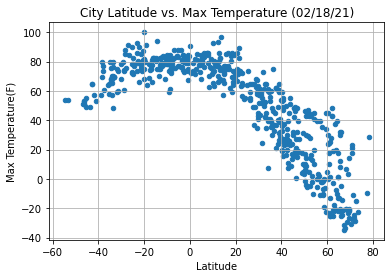

In [86]:
# Create a scatter plot which compares Latitude to Temperature
latitude_and_temperature = clean_weather_df[['Lat', 'Max Temp']]
latitude_and_temperature
latitude_and_temperature.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp', grid = True, figsize = (6,4))
plt.title (f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
print ('This code is analyzing the relationship between Latitude and Maximum Temperature that was recorded in randomly selected cities around the world.')
plt.savefig('output_data/LatVsTempPlot.png')
plt.show()


## Latitude vs. Humidity Plot

This code is analyzing the relationship between Latitude and Humidity level that was recorded in randomly selected cities around the world.


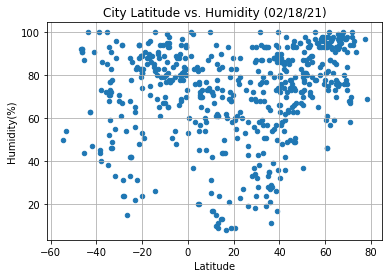

In [87]:
# Create a scatter plot which compares Latitude to Humidity
latitude_and_humidity = clean_weather_df[['Lat', 'Humidity']]
latitude_and_humidity
latitude_and_humidity.plot(kind = 'scatter', x = 'Lat', y = 'Humidity', grid = True, figsize = (6,4))
plt.title (f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
print ('This code is analyzing the relationship between Latitude and Humidity level that was recorded in randomly selected cities around the world.')
plt.savefig('output_data/LatVsHumidityPlot.png')
plt.show()

## Latitude vs. Cloudiness Plot

This code is analyzing the relationship between Latitude and Cloud coverage that was recorded in randomly selected cities around the world.


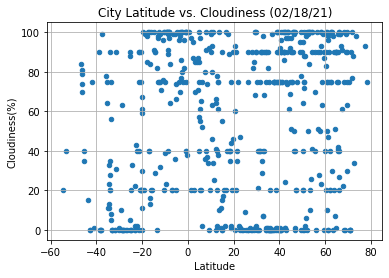

In [88]:
# Create a scatter plot which compares Latitude to Cloudiness
latitude_and_cloudiness = clean_weather_df[['Lat', 'Cloudiness']]
latitude_and_cloudiness
latitude_and_cloudiness.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness', grid = True, figsize = (6,4))
plt.title (f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
print ('This code is analyzing the relationship between Latitude and Cloud coverage that was recorded in randomly selected cities around the world.')
plt.savefig('output_data/LatVsCloudinessPlot.png')
plt.show()

## Latitude vs. Wind Speed Plot

This code is analyzing the relationship between Latitude and Wind speed that was recorded in randomly selected cities around the world.


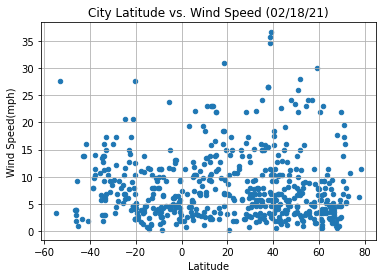

In [89]:
# Create a scatter plot which compares Latitude to Wind Speed
latitude_and_wind_speed = clean_weather_df[['Lat', 'Wind Speed']]
latitude_and_wind_speed
latitude_and_wind_speed.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed', grid = True, figsize = (6,4))
plt.title (f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.ylabel('Wind Speed(mph)')
plt.xlabel('Latitude')
print ('This code is analyzing the relationship between Latitude and Wind speed that was recorded in randomly selected cities around the world.')
plt.savefig('output_data/LatVsWindSpeedPlot.png')
plt.show()

## Linear Regression

In [90]:
# Separate Northern and Southern Hemisphere
northern_hemisphere = clean_weather_df.loc[clean_weather_df['Lat'] >= 0, :]
southern_hemisphere = clean_weather_df.loc[clean_weather_df['Lat'] < 0, :]
northern_hemisphere.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,3.850000e+02
mean,39.176239,12.449505,37.198545,70.867532,56.174026,8.439403,1.613670e+09
std,19.895040,87.940450,33.254955,22.664574,37.764047,6.632642,2.101269e+02
min,0.354600,-173.300000,-34.780000,8.000000,0.000000,0.270000,1.613670e+09
25%,22.758300,-70.027000,14.000000,59.000000,20.000000,3.440000,1.613670e+09
50%,40.283300,21.900000,41.000000,76.000000,74.000000,6.710000,1.613670e+09
75%,55.743500,84.675700,64.720000,88.000000,90.000000,11.180000,1.613670e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,36.550000,1.613671e+09


In [91]:
southern_hemisphere.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,-20.160054,33.806452,75.129655,74.454023,53.275862,7.507299,1.613670e+09
std,13.171797,90.881274,9.943520,19.370309,38.407968,5.063693,2.139735e+02
min,-54.800000,-175.200000,48.000000,15.000000,0.000000,0.310000,1.613670e+09
25%,-31.045250,-50.998175,69.850000,65.000000,20.000000,3.705000,1.613670e+09
50%,-19.957550,27.880800,77.260000,80.000000,63.500000,6.150000,1.613670e+09
75%,-9.074875,124.688800,81.797500,89.000000,90.000000,10.360000,1.613671e+09
max,-0.130300,174.500000,99.990000,100.000000,100.000000,27.630000,1.613671e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

We observed a strong negative relationship between the Maximum Temperature recorded and the Latitude in the Northern Hemisphere. As the latitutude approaches 0, the maximum temperature recorded approaches 100 degrees F. The farther we deviate from the equator, the lower the maximum temperate recorded.

The r-value is: -0.8781575801967348


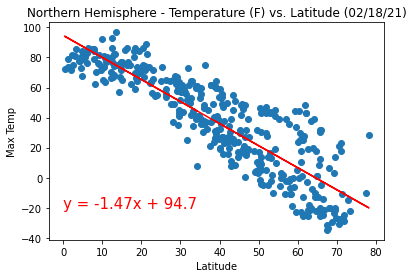

In [92]:
# Create a scatter plot which compares Temperature to Latitude of Northern Hemisphere and run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,-20),fontsize=15,color='red')
plt.title (f"Northern Hemisphere - Temperature (F) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print ('We observed a strong negative relationship between the Maximum Temperature recorded and the Latitude in the Northern Hemisphere. As the latitutude approaches 0, the maximum temperature recorded approaches 100 degrees F. The farther we deviate from the equator, the lower the maximum temperate recorded.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/TempVsLatPlotNH.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

We observed a positive relationship between the Maximum Temperature recorded and the Latitude in the Southern Hemisphere. While the data shows more dispersion in the Southern Hemishpere, the two variables of Latitude and Max Temperature are positively correlated, with warmer temperatures recorded closer to the equator.

The r-value is: 0.6200115602054194


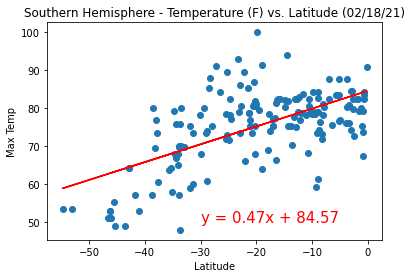

In [93]:
# Create a scatter plot which compares Temperature to Latitude of Southern Hemisphere and run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-30,50),fontsize=15,color='red')
plt.title (f"Southern Hemisphere - Temperature (F) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print ('We observed a positive relationship between the Maximum Temperature recorded and the Latitude in the Southern Hemisphere. While the data shows more dispersion in the Southern Hemishpere, the two variables of Latitude and Max Temperature are positively correlated, with warmer temperatures recorded closer to the equator.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/TempVsLatPlotSH.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

We observed a weak positive relationship between Humidity level and Latitude in the Northern Hemisphere. The two variables plotted are positively correlated, with generally higher humidity levels farther from the equator. Conversely, the humidity level starts to disperse closer to the equator, but a weak correlation still exists.

The r-value is: 0.43520537242256363


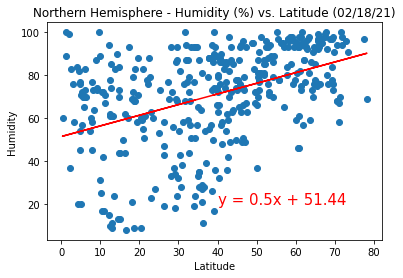

In [94]:
# Create a scatter plot which compares Humidity to Latitude of Northern Hemisphere and run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(40,20),fontsize=15,color='red')
plt.title (f"Northern Hemisphere - Humidity (%) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print ('We observed a weak positive relationship between Humidity level and Latitude in the Northern Hemisphere. The two variables plotted are positively correlated, with generally higher humidity levels farther from the equator. Conversely, the humidity level starts to disperse closer to the equator, but a weak correlation still exists.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/HumidityVsLatPlotNH.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

We observed a weak positive relationship between the Humidity level and the Latitude in the Southern Hemisphere. The two variables plotted are positively correlated, with the humidity level increasing as we move closer to the Equator.

The r-value is: 0.23732197428641338


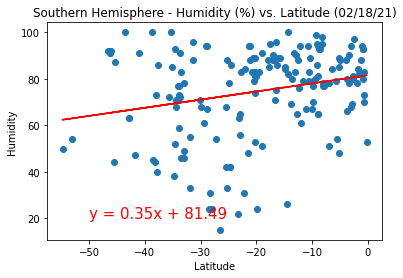

In [95]:
# Create a scatter plot which compares Humidity to Latitude of Southern Hemisphere and run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.title (f"Southern Hemisphere - Humidity (%) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print ('We observed a weak positive relationship between the Humidity level and the Latitude in the Southern Hemisphere. The two variables plotted are positively correlated, with the humidity level increasing as we move closer to the Equator.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/HumidityVsLatPlotSH.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

We observe a very weak positive relationship between Cloud Coverage and Latitude in the Northern Hemisphere. While a weak positive correlation may exist, I would not use these two variables without first analyzing similar data over a greater period of time. Generally, it would make sense that if humidity increases farther you move from the South pole to the North pole, that cloud cover would increase as well. Cloud coverage, precipitation, and humidity would generally be associated with each other.

The r-value is: 0.1334394983899022


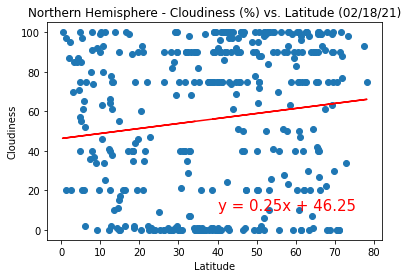

In [96]:
# Create a scatter plot which compares Cloudiness to Latitude of Northern Hemisphere and run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(40,10),fontsize=15,color='red')
plt.title (f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print ('We observe a very weak positive relationship between Cloud Coverage and Latitude in the Northern Hemisphere. While a weak positive correlation may exist, I would not use these two variables without first analyzing similar data over a greater period of time. Generally, it would make sense that if humidity increases farther you move from the South pole to the North pole, that cloud cover would increase as well. Cloud coverage, precipitation, and humidity would generally be associated with each other.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/CloudinessVsLatPlotNH.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Similarly to what we observed in the Northern hemisphere, an increase in Longitude correlates to an increase in the cloudiness levels. As stated perviously, if humidity increases as you move from the South pole to the North pole, a general increase in cloudiness and precipitation would be expected. Northern hemishpere analysis had more data points to plot as well, which could skew the analysis performed in this step.

The r-value is: 0.47572817869850603


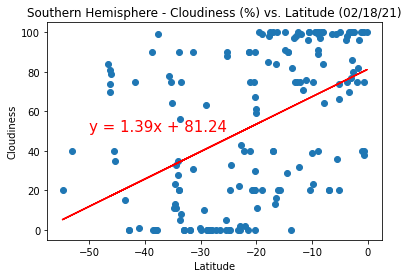

In [97]:
# Create a scatter plot which compares Cloudiness to Latitude of Southern Hemisphere and run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-50,50),fontsize=15,color='red')
plt.title (f"Southern Hemisphere - Cloudiness (%) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print ('Similarly to what we observed in the Northern hemisphere, an increase in Longitude correlates to an increase in the cloudiness levels. As stated perviously, if humidity increases as you move from the South pole to the North pole, a general increase in cloudiness and precipitation would be expected. Northern hemishpere analysis had more data points to plot as well, which could skew the analysis performed in this step.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/CloudinessVsLatPlotSH.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

We observed a very weak negative relationship between Wind Speed and Latitude in the Northern Hemisphere. The general wind speed recorded seems to decrease the farther we move from the Equator.

The r-value is: -0.1271463675472232


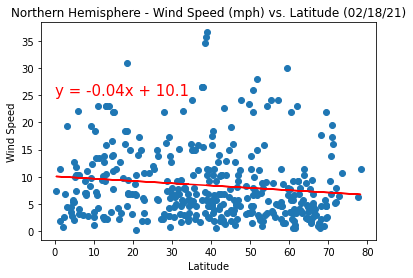

In [98]:
# Create a scatter plot which compares Wind Speed to Latitude of Northern Hemisphere and run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,25),fontsize=15,color='red')
plt.title (f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print ('We observed a very weak negative relationship between Wind Speed and Latitude in the Northern Hemisphere. The general wind speed recorded seems to decrease the farther we move from the Equator.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/WindSpeedVsLatPlotNH.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Continuing from the Northern Hemisphere analysis, we observed a very weak negative relationship between Wind Speed and Latitude in the Southern Hemisphere. As moved from the South pole closer to the equator, the general wind speed seems to decrease.

The r-value is: -0.196182153829382


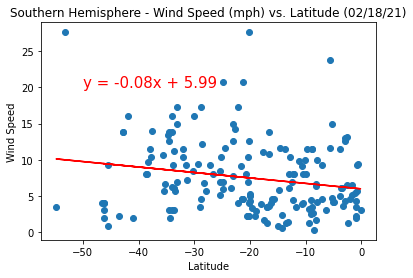

In [99]:
# Create a scatter plot which compares Wind Speed to Latitude of Southern Hemisphere and run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.title (f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print ('Continuing from the Northern Hemisphere analysis, we observed a very weak negative relationship between Wind Speed and Latitude in the Southern Hemisphere. As moved from the South pole closer to the equator, the general wind speed seems to decrease.')
print()
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/WindSpeedVsLatPlotSH.png')
plt.show()

# Weather Data Analysis
## We are analysing the weather of 500+ cities across the world, at varying distances from the equator
* We observed that the correlation between Maximum Temperature recorded and Latitude from Northern Hemisphere and Southern Hemisphere are opposite: Northern Hemisphere has a negative correlation whereas Southern Hemisphere has positive correlation. This is expected, as temperatures increase the closer you get to the equator. The negative correlation for the Northern Hemishpere stronger than the positive correlation for the Southern Hemisphere due to the seasonal position of the Earth. We would expect the correlation to be nearly identical during the Summer and Winter Equinox, but would need more data to make that assessment.
* We also observed that the humidity level recorded is positively correlated for both the Northern and Southern hemipsheres. As you move from the South to the North pole, the humidity level recorded increases as well. This was not something we expected, as we thought that a more symmetric relationship would exist between the humidity level and the absolute longitude difference from the Equator. Additional data, including observations over a greater period of time, precipitation, and other geographical features of the recording location would be needed to determine if there's a valid correlation between these two variables. 
* Cloud coverage was also positively correlated in a non-symmetric way similar to the humidity level. The cloud coverage increased as we moved farther from the South towards the North pole. As we stated previously, these results are expected because if the humidity levels increase (as shown above), we would also expect cloud coverage to increase as well. In addition, we would expect precipitation levels to increase alongside the humidity and cloud coverage, but no analysis was done on precipitation. 
* I feel like data analysis is skewed since the random sample of roughly 550 testing locations did not select equally from both the Northern and Southern hemipsheres. The maximum absolute distance for the cities selected in the Southern Hemisphere was less than 60 degrees, while the maximum absolute distance for the cities selected in the Northern Hemisphere was nearly 80 degrees. The cities in the Northern Hemisphere had an average latitude of 40 degrees N, while the cities in the Southern Hemisphere had an average latitude of 20 degrees S. The standard deviation for the North was roughly 20 degrees, while only 13 degrees for the South. If anything, this would make an interesting analysis for density of population on Earth!